In [2]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt 


data = pd.read_csv('C:/Users/ASUS/AI_Journey/feature_selection/data.csv/data.csv')
originalFeatures = data.columns
print('original feature count : ',len(originalFeatures))
print('original Features', originalFeatures)
data.head()

original feature count :  25
original Features Index(['action_type', 'combined_shot_type', 'game_event_id', 'game_id', 'lat',
       'loc_x', 'loc_y', 'lon', 'minutes_remaining', 'period', 'playoffs',
       'season', 'seconds_remaining', 'shot_distance', 'shot_made_flag',
       'shot_type', 'shot_zone_area', 'shot_zone_basic', 'shot_zone_range',
       'team_id', 'team_name', 'game_date', 'matchup', 'opponent', 'shot_id'],
      dtype='object')


,action_type,combined_shot_type,game_event_id,game_id,lat,loc_x,loc_y,lon,minutes_remaining,period,...,shot_type,shot_zone_area,shot_zone_basic,shot_zone_range,team_id,team_name,game_date,matchup,opponent,shot_id
0,Jump Shot,Jump Shot,10,20000012,33.9723,167,72,-118.1028,10,1,...,2PT Field Goal,Right Side(R),Mid-Range,16-24 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,1
1,Jump Shot,Jump Shot,12,20000012,34.0443,-157,0,-118.4268,10,1,...,2PT Field Goal,Left Side(L),Mid-Range,8-16 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,2
2,Jump Shot,Jump Shot,35,20000012,33.9093,-101,135,-118.3708,7,1,...,2PT Field Goal,Left Side Center(LC),Mid-Range,16-24 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,3
3,Jump Shot,Jump Shot,43,20000012,33.8693,138,175,-118.1318,6,1,...,2PT Field Goal,Right Side Center(RC),Mid-Range,16-24 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,4
4,Driving Dunk Shot,Dunk,155,20000012,34.0443,0,0,-118.2698,6,2,...,2PT Field Goal,Center(C),Restricted Area,Less Than 8 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,5


Text(0.5, 1.0, 'Lat and Lon')

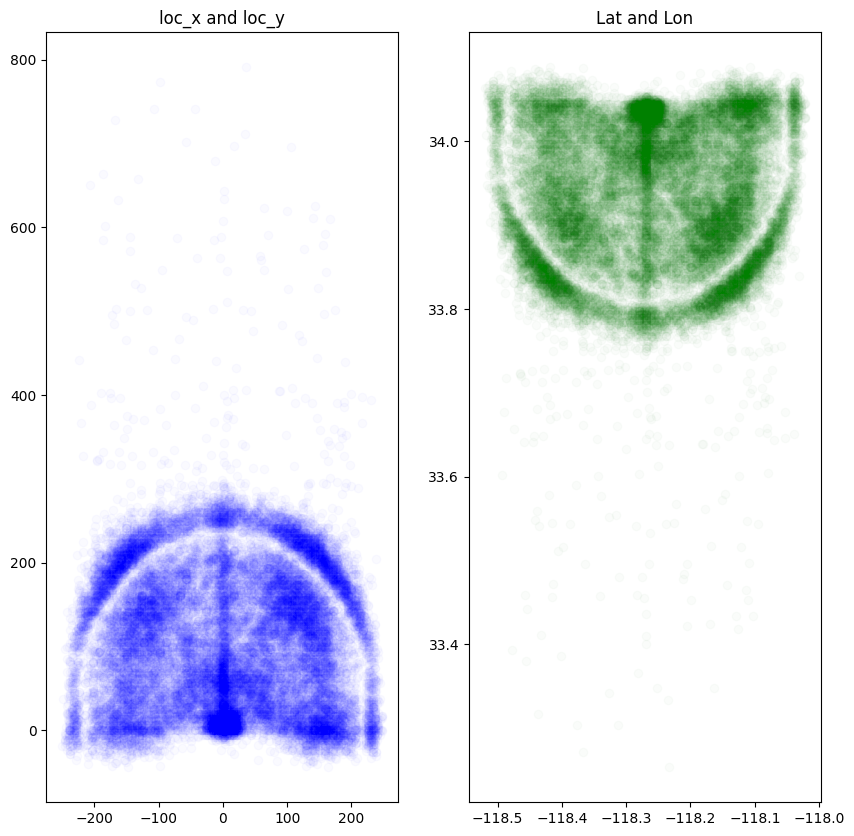

In [3]:
# First, let check out the loc_x and loc_y columns. They probably represent longitude and lattitude 
alpha = 0.02
plt.figure(figsize=(10,10))

# Loc_x and Loc_y
plt.subplot(121)
plt.scatter(data.loc_x, data.loc_y, color='blue', alpha=alpha)
plt.title('loc_x and loc_y')

# Lat and Long
plt.subplot(122)
plt.scatter(data.lon, data.lat, color='green', alpha=alpha)
plt.title('Lat and Lon')

In [11]:
#We get the shape of a baseketball court. The top and botton 'D' 
#Let change themm into polar cordinates for better analysis

data['dist'] = np.sqrt(data['loc_x']**2 + data['loc_y']**2)

loc_x_zero = data['loc_x'] == 0
data['angle'] = np.array([0]*len(data))
data['angle'][~loc_x_zero] = np.arctan(data['loc_y'][~loc_x_zero] / data['loc_x'][~loc_x_zero])
data['angle'][loc_x_zero] = np.pi / 2
#With these new columns, we don't need the old lat and long column

C:\Users\ASUS\AppData\Local\Temp\ipykernel_9908\2789106996.py:8: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  data['angle'][~loc_x_zero] = np.arctan(data['loc_y'][~loc_x_zero] / data['loc_x'][~loc_x_zero])
C:\Users\ASUS\AppData\Local\Temp\i

In [10]:
# Combinning our remaining minutes and second columns into one
data['remaining_time_sec'] = data['minutes_remaining'] * 60 + data['seconds_remaining']

,action_type,combined_shot_type,game_event_id,game_id,lat,loc_x,loc_y,lon,minutes_remaining,period,...,shot_zone_area,shot_zone_basic,shot_zone_range,team_id,team_name,game_date,matchup,opponent,shot_id,remaining_time_sec
0,Jump Shot,Jump Shot,10,20000012,33.9723,167,72,-118.1028,10,1,...,Right Side(R),Mid-Range,16-24 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,1,627
1,Jump Shot,Jump Shot,12,20000012,34.0443,-157,0,-118.4268,10,1,...,Left Side(L),Mid-Range,8-16 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,2,622
2,Jump Shot,Jump Shot,35,20000012,33.9093,-101,135,-118.3708,7,1,...,Left Side Center(LC),Mid-Range,16-24 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,3,465
3,Jump Shot,Jump Shot,43,20000012,33.8693,138,175,-118.1318,6,1,...,Right Side Center(RC),Mid-Range,16-24 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,4,412
4,Driving Dunk Shot,Dunk,155,20000012,34.0443,0,0,-118.2698,6,2,...,Center(C),Restricted Area,Less Than 8 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,5,379
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30692,Jump Shot,Jump Shot,397,49900088,33.9963,1,48,-118.2688,6,4,...,Center(C),In The Paint (Non-RA),Less Than 8 ft.,1610612747,Los Angeles Lakers,2000-06-19,LAL vs. IND,IND,30693,365
30693,Tip Shot,Tip Shot,398,49900088,34.0443,0,0,-118.2698,6,4,...,Center(C),Restricted Area,Less Than 8 ft.,1610612747,Los Angeles Lakers,2000-06-19,LAL vs. IND,IND,30694,365
30694,Running Jump Shot,Jump Shot,426,49900088,33.8783,-134,166,-118.4038,3,4,...,Left Side Center(LC),Mid-Range,16-24 ft.,1610612747,Los Angeles Lakers,2000-06-19,LAL vs. IND,IND,30695,208
30695,Jump Shot,Jump Shot,448,49900088,33.7773,31,267,-118.2388,2,4,...,Center(C),Above the Break 3,24+ ft.,1610612747,Los Angeles Lakers,2000-06-19,LAL vs. IND,IND,30696,130


In [14]:
# Lets look at team_id and name
print(data['team_id'].unique())
print(data['team_name'].unique())

[1610612747]
['Los Angeles Lakers']


In [17]:
# Team_id and Team_name is useless : the whole column contains only one value
# Now let's look at matchup and opponent

pd.DataFrame({'matchup': data.matchup, 'opponent':data.opponent})

,matchup,opponent
0,LAL @ POR,POR
1,LAL @ POR,POR
2,LAL @ POR,POR
3,LAL @ POR,POR
4,LAL @ POR,POR
...,...,...
30692,LAL vs. IND,IND
30693,LAL vs. IND,IND
30694,LAL vs. IND,IND
30695,LAL vs. IND,IND


Text(0.5, 1.0, 'Dist and Shot_Distance')

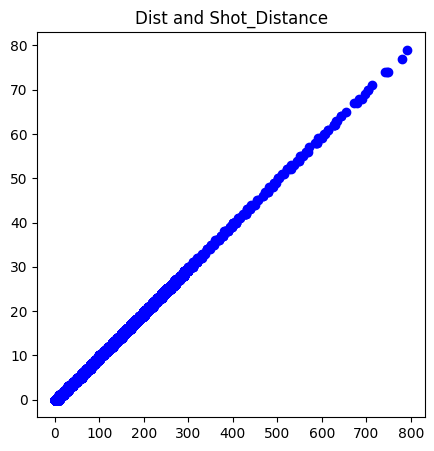

In [18]:
#The basically contain the same infor
#Lts us see how distance and short_distance differ
#The distance column we created, hold the same values as the shot_distance.

#By using filtering method we will be eliminating the one of those columns

plt.figure(figsize=(5,5))
plt.scatter(data.dist, data.shot_distance, color='blue')
plt.title('Dist and Shot_Distance')

Text(0.5, 1.0, 'Shot_Zone_Range')

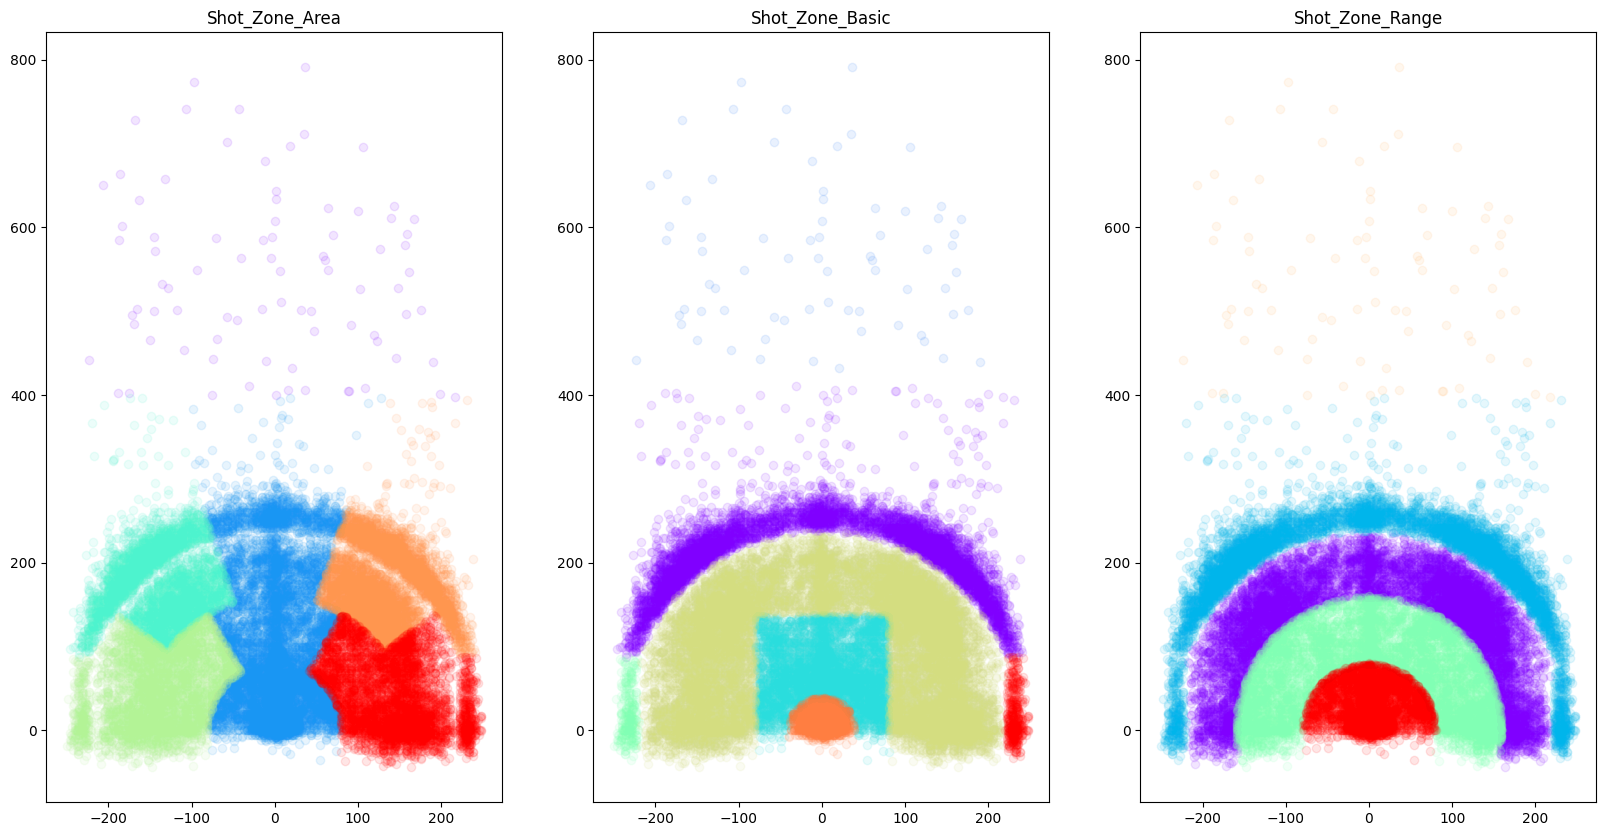

In [19]:
# Now we will be looking at the shot_zone_area, shot_zone_basic, shot_zone_ranges
import matplotlib.cm as cm 

plt.figure(figsize=(20,10))

def scatter_plot_by_category(feat):
    alpha = 0.1
    gs = data.groupby(feat)
    cs = cm.rainbow(np.linspace(0,1, len(gs)))
    for g,c in zip(gs,cs):
        plt.scatter(g[1].loc_x, g[1].loc_y, color=c, alpha=alpha)
        
# shot_zone_area
plt.subplot(131)
scatter_plot_by_category('shot_zone_area')
plt.title('Shot_Zone_Area')

# shot_zone_basic
plt.subplot(132)
scatter_plot_by_category('shot_zone_basic')
plt.title('Shot_Zone_Basic')

# shot_zone_range
plt.subplot(133)
scatter_plot_by_category('shot_zone_range')
plt.title('Shot_Zone_Range')

In [21]:
# They are regions of the court, But we have already stored this info in angle and dist columns
# So that will make shot_zone_basic, shot_zone_area, shot_zone_range useless columns (they are all redundant)

# now let remove the useless columns
drops = ['shot_id','team_id','team_name','shot_zone_area','shot_zone_basic','shot_zone_range','matchup','lon','lat','seconds_remaining','minutes_remaining', \
    'shot_distance','loc_x','loc_y','game_event_id','game_id','game_date'
    ]
for drop in drops:
    data = data.drop(drop,axis='columns')

In [23]:
# compate the original feautures to the remaining features
print('Original To New Count :',len(originalFeatures),len(data.columns))
print(data.head())

Original To New Count : 25 11
         action_type combined_shot_type  period  playoffs   season  \
0          Jump Shot          Jump Shot       1         0  2000-01   
1          Jump Shot          Jump Shot       1         0  2000-01   
2          Jump Shot          Jump Shot       1         0  2000-01   
3          Jump Shot          Jump Shot       1         0  2000-01   
4  Driving Dunk Shot               Dunk       2         0  2000-01   

   shot_made_flag       shot_type opponent  remaining_time_sec        dist  \
0             NaN  2PT Field Goal      POR                 627  181.859836   
1             0.0  2PT Field Goal      POR                 622  157.000000   
2             1.0  2PT Field Goal      POR                 465  168.600119   
3             0.0  2PT Field Goal      POR                 412  222.865430   
4             1.0  2PT Field Goal      POR                 379    0.000000   

      angle  
0  0.407058  
1 -0.000000  
2 -0.928481  
3  0.903063  
4  1.57079